# 1 - Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import pickle
import cv2
from os import listdir

from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [3]:
from keras.models import Sequential
from keras.optimizers import Adam

In [4]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import AveragePooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense

In [5]:
import tensorflow as tf
from tensorflow.keras.utils import img_to_array

In [6]:
from tensorflow.keras.applications import ResNet50V2

In [7]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [8]:
#initialize global variables

In [17]:
EPOCHS = 5
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((224, 224))
image_size = 0
width=256
height=256
depth=3

## 2 - Data Preprocessing and Visualisation


In [18]:
data  = [['Pepper__bell___Bacterial_spot' , 997],
        ['Pepper__bell___healthy', 1478],
        ['Potato___Early_blight',1000],
        ['Potato___Late_blight',1000],
        ['Potato___healthy',152],
        ['Tomato_Bacterial_spot',2127],
        ['Tomato_Early_blight',1000],
        ['Tomato_Late_blight',1909],
        ['Tomato_Leaf_Mold' ,952],
        ['Tomato_Septoria_leaf_spot', 1771],
        ['Tomato_Spider_mites_Two_spotted_spider_mite', 1676], 
        ['Tomato__Target_Spot', 1404],
        ['Tomato__Tomato_mosaic_virus', 373],
        ['Tomato_healthy', 1591],
        ['Tomato__Tomato_YellowLeaf__Curl_Virus', 3209]]

In [19]:
df = pd.DataFrame(data, columns=['Image_Class', 'Image_Count'])
df.groupby('Image_Class').sum().reset_index()

,Image_Class,Image_Count
0,Pepper__bell___Bacterial_spot,997
1,Pepper__bell___healthy,1478
2,Potato___Early_blight,1000
3,Potato___Late_blight,1000
4,Potato___healthy,152
5,Tomato_Bacterial_spot,2127
6,Tomato_Early_blight,1000
7,Tomato_Late_blight,1909
8,Tomato_Leaf_Mold,952
9,Tomato_Septoria_leaf_spot,1771


In [20]:
groupedvalues = df.groupby('Image_Class').sum().reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Pepper__bell___Bacterial_spot'),
  Text(1, 0, 'Pepper__bell___healthy'),
  Text(2, 0, 'Potato___Early_blight'),
  Text(3, 0, 'Potato___Late_blight'),
  Text(4, 0, 'Potato___healthy'),
  Text(5, 0, 'Tomato_Bacterial_spot'),
  Text(6, 0, 'Tomato_Early_blight'),
  Text(7, 0, 'Tomato_Late_blight'),
  Text(8, 0, 'Tomato_Leaf_Mold'),
  Text(9, 0, 'Tomato_Septoria_leaf_spot'),
  Text(10, 0, 'Tomato_Spider_mites_Two_spotted_spider_mite'),
  Text(11, 0, 'Tomato__Target_Spot'),
  Text(12, 0, 'Tomato__Tomato_YellowLeaf__Curl_Virus'),
  Text(13, 0, 'Tomato__Tomato_mosaic_virus'),
  Text(14, 0, 'Tomato_healthy')])

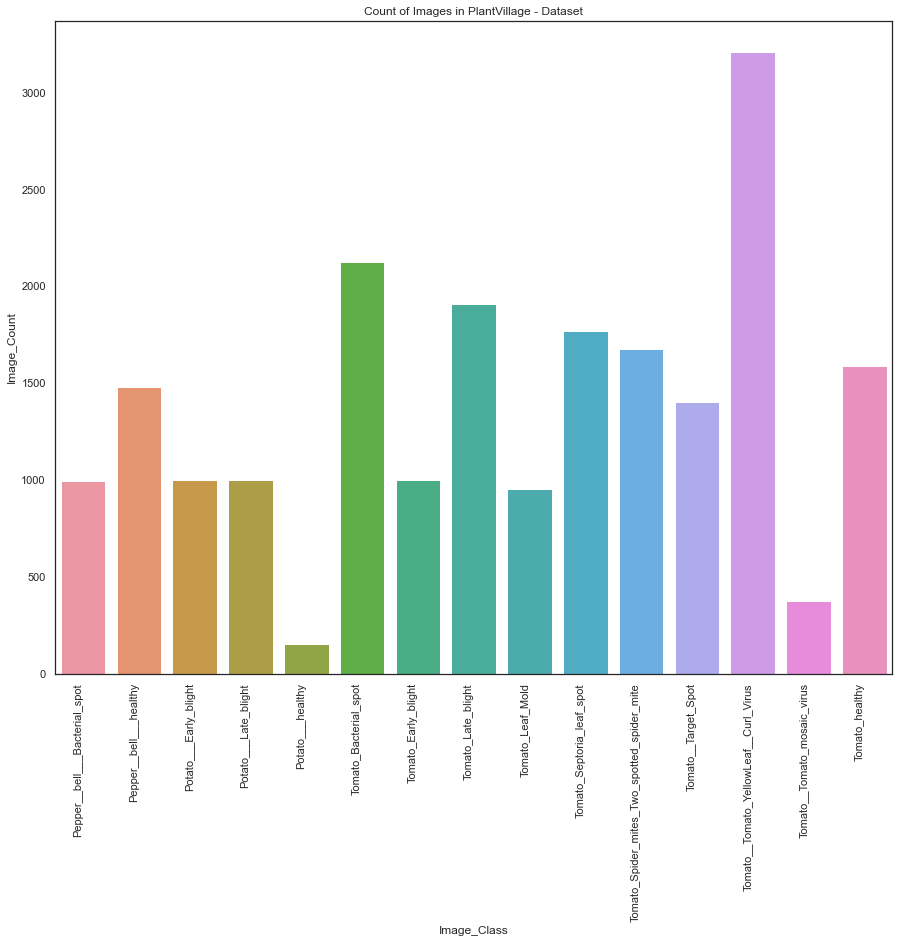

In [21]:
plt.figure(figsize=(15,12))
plt.title("Count of Images in PlantVillage - Dataset")


sns.set_theme(style='white')

ax = sns.barplot(
    x='Image_Class', 
    y = 'Image_Count',
    data = groupedvalues)


plt.xticks(rotation = 90, ha='right')


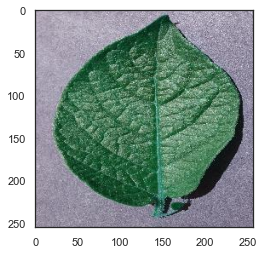

In [22]:
img = cv2.imread('C://Users//LENOVO//Desktop//Project-Crop Disease//New folder//plantdisease_dataset//Potato___healthy/9d7d1bb9-1b10-4a8f-a961-e404b9d5acf8___RS_HL 1960.JPG')		# this is read in BGR format
plt.imshow(img)
plt.show()

In [23]:
img = cv2.imread('C://Users//LENOVO//Desktop//Project-Crop Disease//New folder//plantdisease_dataset//Potato___healthy/9d7d1bb9-1b10-4a8f-a961-e404b9d5acf8___RS_HL 1960.JPG', 0)

cv2.imshow("Grayscale Image", img)

# waiting for key event
cv2.waitKey(0)

# destroying all windows
cv2.destroyAllWindows()

### GreyScale ( not used - as many features of the leafs are lost)
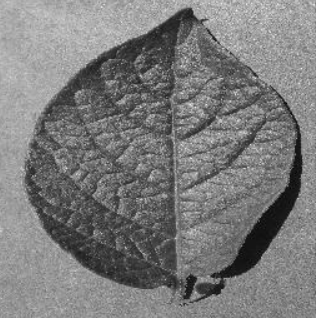


### Converting Image to Array

In [24]:
def convert_image_to_array(image_dir):
    try:
        im_size=224
        
        image = cv2.imread(image_dir)
        
        image = cv2.resize(image, dsize=(im_size, im_size))
        
       
       
        
        
        
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    
    
    
    
    except Exception as e:
        print(f"Error : {e}")
        return None

In [25]:
image_list, label_list = [], []
directory_root = "C://Users//LENOVO//Desktop//Project-Crop Disease//New folder"
imsize=256


try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}//{plant_folder}")

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}//{plant_folder}//{plant_disease_folder}//")

            for image in plant_disease_image_list[:200]:
                image_directory = f"{directory_root}//{plant_folder}//{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image=cv2.imread(image_directory)
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Pepper__bell___Bacterial_spot ...
[INFO] Processing Pepper__bell___healthy ...
[INFO] Processing Potato___Early_blight ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Potato___Late_blight ...
[INFO] Processing Tomato_Bacterial_spot ...
[INFO] Processing Tomato_Early_blight ...
[INFO] Processing Tomato_healthy ...
[INFO] Processing Tomato_Late_blight ...
[INFO] Processing Tomato_Leaf_Mold ...
[INFO] Processing Tomato_Septoria_leaf_spot ...
[INFO] Processing Tomato_Spider_mites_Two_spotted_spider_mite ...
[INFO] Processing Tomato__Target_Spot ...
[INFO] Processing Tomato__Tomato_mosaic_virus ...
[INFO] Processing Tomato__Tomato_YellowLeaf__Curl_Virus ...
[INFO] Image loading completed


In [26]:
image_size = len(image_list)

In [27]:
label_binarizer = LabelBinarizer()

image_labels = label_binarizer.fit_transform(label_list)

pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))

n_classes = len(label_binarizer.classes_)


In [28]:
print(label_binarizer.classes_)

['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Tomato_Bacterial_spot' 'Tomato_Early_blight' 'Tomato_Late_blight'
 'Tomato_Leaf_Mold' 'Tomato_Septoria_leaf_spot'
 'Tomato_Spider_mites_Two_spotted_spider_mite' 'Tomato__Target_Spot'
 'Tomato__Tomato_YellowLeaf__Curl_Virus' 'Tomato__Tomato_mosaic_virus'
 'Tomato_healthy']


In [29]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [30]:
np_image_list.shape

(2952, 224, 224, 3)

In [31]:
image_labels.shape

(2952, 15)

### Spliting the data in TEST & TRAIN

In [32]:
print("[INFO] Spliting data to train, test")
X_train, X_test, y_train, y_test = train_test_split(np_image_list, 
                                                    image_labels, 
                                                    test_size=0.2, 
                                                    random_state = 42)
                                                    

[INFO] Spliting data to train, test


In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2361, 224, 224, 3)
(2361, 15)
(591, 224, 224, 3)
(591, 15)


## 3 - Image Augmentation

In [34]:
aug = ImageDataGenerator(
            rotation_range=25, 
            width_shift_range=0.1,
            height_shift_range=0.1, 
            shear_range=0.2, 
            zoom_range=0.2,
            horizontal_flip=True, 
            fill_mode="nearest")

# 4 - Using RestNet50V2


In [35]:
#pretrained model

In [36]:
pretrained_model = ResNet50V2(
                    include_top=False, 
                    weights='imagenet', 
                    input_shape=(224,224,3))

In [37]:
for layer in pretrained_model.layers:
    layer.trainable = False
    
for layer in pretrained_model.layers[-5:]:
    layer.trainable = True

## 5 - Custom training last layers

In [38]:
custom_model = Sequential()

In [39]:
custom_model.add(pretrained_model)

#1
custom_model.add(AveragePooling2D(pool_size=(7, 7)))

#2
custom_model.add(Flatten(name="flatten"))

#3
custom_model.add(Dense(128, activation='relu'))

#4
custom_model.add(Dropout(0.5))

#5
custom_model.add(Dense(15, activation='softmax'))


custom_model.layers[0].trainable = False    

In [40]:
custom_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 average_pooling2d (AverageP  (None, 1, 1, 2048)       0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 15)                1935      
                                                        

## 6 - Optimizers ~ Adam optimization

In [41]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

# distribution
custom_model.compile(loss='categorical_crossentropy', 
                     optimizer=opt,
                     metrics=["accuracy"])

C:\Users\LENOVO\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


## 7- Running on 50 epochs

In [42]:
print("[INFO] training network...")

history = custom_model.fit_generator(
                
                aug.flow(X_train, y_train, batch_size=BS),
                
                validation_data=(X_test, y_test),
                
                steps_per_epoch=len(X_train) // BS,
                
                epochs=EPOCHS, 
    
                verbose=1)

[INFO] training network...


<ipython-input-42-1bcb2bc86bd6>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = custom_model.fit_generator(


Epoch 1/5
73/73 [==============================] - 140s 2s/step - loss: 2.0147 - accuracy: 0.3585 - val_loss: 1.2773 - val_accuracy: 0.6176
Epoch 2/5
73/73 [==============================] - 128s 2s/step - loss: 1.3422 - accuracy: 0.5590 - val_loss: 0.9481 - val_accuracy: 0.6751
Epoch 3/5
73/73 [==============================] - 131s 2s/step - loss: 1.0959 - accuracy: 0.6286 - val_loss: 0.7825 - val_accuracy: 0.7479
Epoch 4/5
73/73 [==============================] - 124s 2s/step - loss: 0.9466 - accuracy: 0.6788 - val_loss: 0.6865 - val_accuracy: 0.7563
Epoch 5/5
73/73 [==============================] - 126s 2s/step - loss: 0.8754 - accuracy: 0.7012 - val_loss: 0.6683 - val_accuracy: 0.7614


## 8 - Potting Validation Accuracy and Classification Report

<AxesSubplot: >

<Figure size 1080x1080 with 0 Axes>

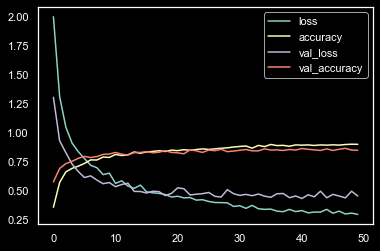

In [103]:

loss_df = pd.DataFrame(custom_model.history.history)
plt.style.use(['dark_background'])
plt.figure(figsize=(15,15))
loss_df.plot()


### saving model as "h5" file

In [104]:
model_save_name = 'Classifier_Model.model'
path = F"C://Users//LENOVO//Desktop//Project//{model_save_name}" 
tf.keras.models.save_model(custom_model, path, save_format="h5")


In [105]:
pred = custom_model.predict(X_test)

19/19 [==============================] - 37s 2s/step


### Classification Report

In [111]:
class_rep = classification_report(y_test.argmax(axis=1), pred.argmax(axis=1)) 
print(class_rep)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        45
           1       0.95      0.93      0.94        40
           2       0.95      0.96      0.95        54
           3       0.86      0.88      0.87        43
           4       0.94      0.85      0.89        20
           5       0.91      0.86      0.89        37
           6       0.88      0.51      0.65        41
           7       0.78      0.83      0.81        35
           8       0.81      0.76      0.78        38
           9       0.63      0.79      0.70        33
          10       0.64      0.89      0.74        36
          11       0.80      0.69      0.74        51
          12       0.93      0.88      0.90        32
          13       0.78      1.00      0.88        39
          14       1.00      0.89      0.94        47

    accuracy                           0.85       591
   macro avg       0.85      0.85      0.84       591
weighted avg       0.86   

## 6 -  Testing a random plant leaf image 

In [107]:
path = 'C://Users//LENOVO//Desktop/Project-Crop Disease//PLB.jpg'
test_img = convert_image_to_array(path)


lst = []
lst.append(test_img)
test_list = np.array(lst, dtype=np.float16) / 225.0
test_list.shape



(1, 224, 224, 3)

In [108]:
test_pred = custom_model.predict(test_list)

1/1 [==============================] - 0s 207ms/step


In [109]:
output = label_binarizer.classes_[np.argmax(test_pred)]

Disease detected: Tomato_Late_blight


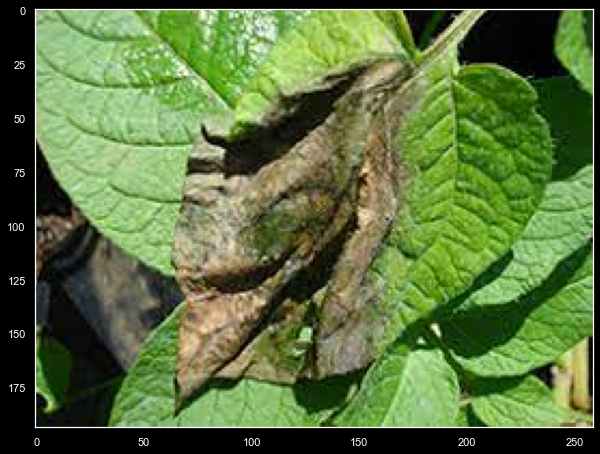

In [110]:
img = Image.open(path)
img = np.array(img)
plt.figure(figsize = (10, 10))
plt.imshow(img)

print("Disease detected: {}".format(output))

# End
